# <a id='0'>Objective:</a>
Predict clients' repayment abilities to ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

### <a id='0'>Notes:</a>
Create scripts for: <br>
- missing data
- plots

# <a id='0'>O.S.E.M.N </a> 
- <a href='#1'>1. Obtain Data: Gather Data & Setup up environment</a>
- <a href='#2'>2. Scrub Data: Data Prep</a>
- <a href='#3'> 3. Explore data: EDA / Feature Engineering</a>
    - <a href='#3-1'>3.1 Application Train</a>
        - <a href='#3-1-1'>3.1.1 Exploration Column1</a>
    - <a href='#3-2'>3.2 Bureau</a>
    - <a href='#3-3'>3.3 Bureau Balance</a>
    - <a href='#3-4'>3.4 Credit Card Balance</a>
    - <a href='#3-5'>3.5 POS Cash Balance</a>
    - <a href='#3-6'>3.6 Previous Application</a>
    - <a href='#3-7'>3.7 Installation Payments</a>
- <a href='#4'> 4. Model Data: Model Data for Prediction & Cross Validate</a>
- <a href='#4'> 5. iNterpret Data: Give Insights</a>

## <a id='1'>1. Obtain Data</a>

In [189]:
# Import libraries
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# import plotly.plotly as py
# import plotly.graph_objs as go
import seaborn as sns
%matplotlib inline 

In [218]:
# Functions

# Function to plot count of values and the percentage
def plot_percent(feature,label_rotation=False,horizontal_layout=True):
    # Create the value counts of the variable
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'value counts': temp.values})

    # Calculate the percentage of target=1 per category value
    calc_perc = application_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    calc_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    
    # color palette
    sns.set_color_codes('pastel')
    
    # visual 1
    s = sns.barplot(ax=ax1, x = feature, y='value counts',data=df1).set_title('Gender Distribution', fontsize=16)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # visual 2
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=calc_perc[feature], data=calc_perc).set_title('Percent where Target = 1', fontsize=16)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();
    
# Function to plot count of values and drill down into detail
def plot_dist(feature,label_rotation=False,horizontal_layout=True):
    # Create the value counts of the variable
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'value counts': temp.values})

    # Calculate the occurence of target=1 per category value
    temp1 = application_train[application_train['TARGET'] == 1]
    temp1 = temp1[feature].value_counts()
    df_temp1 = pd.DataFrame({feature: temp1.index,'value counts': temp1.values})

    # Calculate the occurence of target=0 per category value
    temp0 = application_train[application_train['TARGET'] == 0]
    temp0 = temp0[feature].value_counts()
    df_temp0 = pd.DataFrame({feature: temp0.index,'value counts': temp0.values})
    
    if(horizontal_layout):
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,10))
    else:
        fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(12,14))
    
    # color palette
    sns.set_color_codes('pastel')
    
    # visual 1
    s = sns.barplot(ax=ax1, x = feature, y='value counts',data=df1)
    s.set_ylim([0,210000])
    s.set_title('Gender Distribution', fontsize=24)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # visual 2
    s = sns.barplot(ax=ax2, x = feature, y='value counts', order=df_temp1[feature], data=df_temp1)
    s.set_ylim([0,210000])
    s.set_title('Target = 1',fontsize=24)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # visual 3
    s = sns.barplot(ax=ax3, x = feature, y='value counts', order=df_temp0[feature], data=df_temp0)
    s.set_ylim([0,210000])
    s.set_title('Target = 0',fontsize=24)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
        
    plt.ylabel('value counts', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    
    plt.show();

For column description for each dataset please refer to HomeCredit_columns_description.csv located:
https://www.kaggle.com/c/home-credit-default-risk/data.

<img src="https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png" width="800"></img>

In [194]:
# Read in dataset
# Main Datasets
application_train = pd.read_csv('./data/application_train.csv')
application_test = pd.read_csv('./data/application_test.csv')
# Supplement Dataset
bureau = pd.read_csv('./data/bureau.csv')
bureau_balance = pd.read_csv('./data/bureau_balance.csv')
POS_CASH_balance = pd.read_csv('./data/POS_CASH_balance.csv')
credit_card_balance = pd.read_csv('./data/credit_card_balance.csv')
previous_application = pd.read_csv('./data/previous_application.csv')
installments_payments = pd.read_csv('./data/installments_payments.csv')

In [6]:
print('\033[1m'+'DATASET','(ROWS, COLUMNS)'+'\033[0m')
print('application_train',application_train.shape)
print('application_test',application_test.shape)
print('bureau',bureau.shape)
print('bureau_balance',bureau_balance.shape)
print('POS_CASH_balance',POS_CASH_balance.shape)
print('credit_card_balance',credit_card_balance.shape)
print('previous_application',previous_application.shape)
print('installments_payments',installments_payments.shape)

DATASET (ROWS, COLUMNS)
application_train (307511, 122)
application_test (48744, 121)
bureau (1716428, 17)
bureau_balance (27299925, 3)
POS_CASH_balance (10001358, 8)
credit_card_balance (3840312, 23)
previous_application (1670214, 37)
installments_payments (13605401, 8)


### Quick Exploration of the data

In [12]:
at = application_train
at.sort_values("TARGET",ascending=False).head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
142676,265437,1,Cash loans,M,N,N,0,76500.0,495000.0,16096.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
71932,183409,1,Cash loans,F,N,Y,0,225000.0,247275.0,22810.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
58253,167527,1,Cash loans,M,Y,Y,3,150750.0,315000.0,34056.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
142665,265426,1,Cash loans,M,Y,Y,2,225000.0,473760.0,50400.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0


>  <b>Target variable</b>
<br />- 1 if he/she had LATE payments more than X days on at least one of the first Y installments of the loan. <br />- 0 in all other cases

In [18]:
null_data = at[at.isnull().any(axis=1)].count()

In [5]:
b = bureau
b.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [4]:
bb = bureau_balance
bb.head(5)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [11]:
pcb = POS_CASH_balance
pcb.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [7]:
ccb = credit_card_balance
ccb.head(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [10]:
pa = previous_application
pa.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
ip = installments_payments
ip.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


## <a id='2'>2. Scrub Data</a>

### Missing Data


In [14]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [15]:
missing_data(application_train).head()

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963


In [16]:
missing_data(bureau).head()

,Total,Percent
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932


In [17]:
missing_data(bureau_balance).head()

,Total,Percent
STATUS,0,0.0
MONTHS_BALANCE,0,0.0
SK_ID_BUREAU,0,0.0


In [19]:
missing_data(POS_CASH_balance).head()

,Total,Percent
CNT_INSTALMENT_FUTURE,26087,0.260835
CNT_INSTALMENT,26071,0.260675
SK_DPD_DEF,0,0.000000
SK_DPD,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000


In [20]:
missing_data(credit_card_balance).head()

,Total,Percent
AMT_PAYMENT_CURRENT,767988,19.998063
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872


In [22]:
missing_data(previous_application).head()

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_DOWN_PAYMENT,895844,53.636480
AMT_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754


In [23]:
missing_data(installments_payments).head()

,Total,Percent
AMT_PAYMENT,2905,0.021352
DAYS_ENTRY_PAYMENT,2905,0.021352
AMT_INSTALMENT,0,0.000000
DAYS_INSTALMENT,0,0.000000
NUM_INSTALMENT_NUMBER,0,0.000000


## <a id='3'>3. Explore Data</a>

### First thing to explore is how is the output distributed

In [195]:
at = application_train
temp = at["TARGET"].value_counts()
temp

0    282686
1     24825
Name: TARGET, dtype: int64

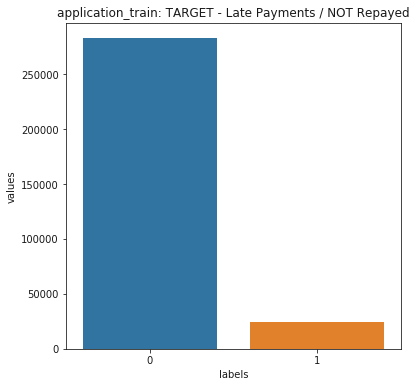

In [80]:
# Target Variable Distribution
at = application_train
temp = at["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('application_train: TARGET - Late Payments / NOT Repayed')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

### <a id='3.1'>3.1 Application Train</a>

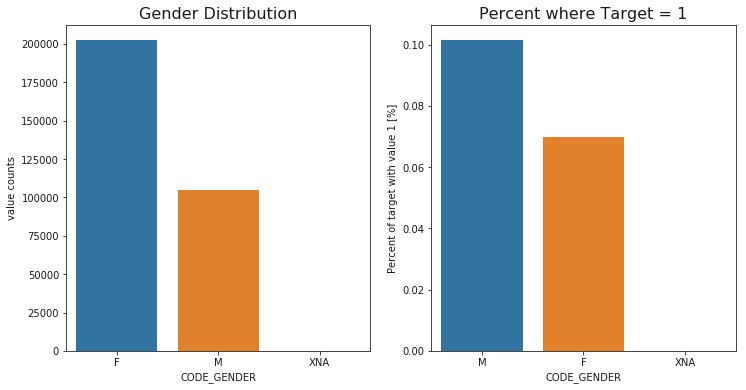

In [196]:
# Percent of Gender Distribution
plot_percent('CODE_GENDER')

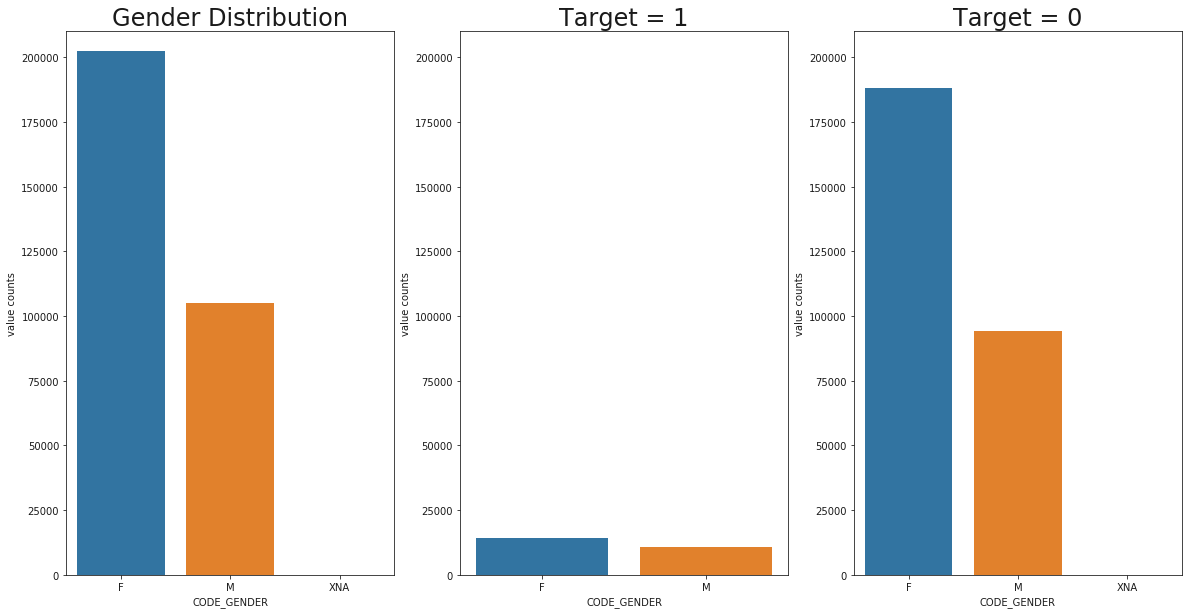

In [219]:
# Distribution
plot_dist('CODE_GENDER')

In [33]:
# Count Target against variable
at = application_train
at.groupby(['TARGET','CODE_GENDER']).size()


TARGET
0    282686
1     24825
dtype: int64

In [ ]:
# To do List:
# Check all missing values
# Mean Median Mode
# Change all categories to correct type as needed
# feature Engineer
# Change categorical columns to dummy variables